In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import random
from scipy.optimize import curve_fit
import math
from tqdm import tqdm

In [3]:
M_list = np.loadtxt('M.txt', dtype = float)
M_list = M_list.tolist()

Chi_list = np.loadtxt('chi.txt',dtype = float)
Chi_list = Chi_list.tolist()

E_list = np.loadtxt('E.txt',dtype = float)
E_list = E_list.tolist()

Cv_list = np.loadtxt('cv.txt', dtype = float)
Cv_list = Cv_list.tolist()

S0SR_list = pd.read_hdf("s0sr_data.h5",key = 'data')

In [4]:
S0SR_list

,0,1,2,3,4,5,6,7,8,9,...,986,987,988,989,990,991,992,993,994,995
0,"[1, -1, -1, -1, 1, 1, -1, 1, -1, -1, 1, -1, -1...","[1, -1, -1, -1, 1, 1, -1, 1, -1, -1, 1, -1, -1...","[1, -1, -1, -1, 1, 1, -1, 1, -1, -1, 1, -1, -1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, -...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",...,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,"[1, -1, -1, -1, 1, 1, 1, 1, -1, -1, -1, -1, -1...","[1, -1, -1, -1, 1, 1, 1, 1, -1, -1, -1, -1, -1...","[1, -1, -1, -1, 1, 1, 1, 1, -1, -1, -1, -1, -1...","[1, -1, -1, -1, 1, 1, 1, 1, -1, -1, -1, -1, -1...","[1, -1, -1, -1, 1, 1, 1, 1, -1, -1, -1, -1, -1...","[1, -1, -1, -1, 1, 1, 1, 1, -1, -1, -1, -1, -1...","[1, -1, -1, -1, 1, 1, 1, 1, -1, -1, -1, -1, -1...","[1, -1, -1, -1, 1, 1, 1, 1, -1, -1, -1, -1, -1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1...",...,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
2,"[1, 1, -1, 1, -1, 1, 1, 1, -1, 1, -1, -1, -1, ...","[1, 1, -1, 1, -1, 1, 1, 1, -1, 1, -1, -1, -1, ...","[1, 1, -1, 1, -1, 1, 1, 1, -1, 1, -1, -1, -1, ...","[1, 1, -1, 1, -1, 1, 1, 1, -1, 1, -1, -1, -1, ...","[1, 1, -1, 1, -1, 1, 1, 1, -1, 1, -1, -1, -1, ...","[1, 1, -1, 1, -1, 1, 1, 1, -1, 1, -1, -1, -1, ...","[1, 1, -1, 1, -1, 1, 1, 1, -1, 1, -1, -1, -1, ...","[1, 1, -1, 1, -1, 1, 1, 1, -1, 1, -1, -1, -1, ...","[1, 1, -1, 1, -1, 1, 1, 1, -1, 1, -1, -1, -1, ...","[1, 1, -1, 1, -1, 1, 1, 1, -1, 1, -1, -1, -1, ...",...,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
3,"[1, -1, -1, 1, -1, 1, 1, 1, -1, -1, 1, -1, 1, ...","[1, -1, -1, 1, -1, 1, 1, 1, -1, -1, 1, -1, 1, ...","[1, -1, -1, 1, -1, 1, 1, 1, -1, -1, 1, -1, 1, ...","[1, -1, -1, 1, -1, 1, 1, 1, -1, -1, 1, -1, 1, ...","[1, -1, -1, 1, -1, 1, 1, 1, -1, -1, 1, -1, 1, ...","[1, -1, -1, 1, -1, 1, 1, 1, -1, -1, 1, -1, 1, ...","[1, -1, -1, 1, -1, 1, 1, 1, -1, -1, 1, -1, 1, ...","[1, -1, -1, 1, -1, 1, 1, 1, -1, -1, 1, -1, 1, ...","[1, -1, -1, 1, -1, 1, 1, 1, -1, -1, 1, -1, 1, ...","[1, -1, -1, 1, -1, 1, 1, 1, -1, -1, 1, -1, 1, ...",...,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 

In [4]:
M

NameError: name 'M' is not defined

In [5]:
T= [0.1, 0.5, 1.0, 1.5, 1.7, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.7, 3.0, 3.5, 4.0, 4.5, 5.0]

## Fit Magetization Function

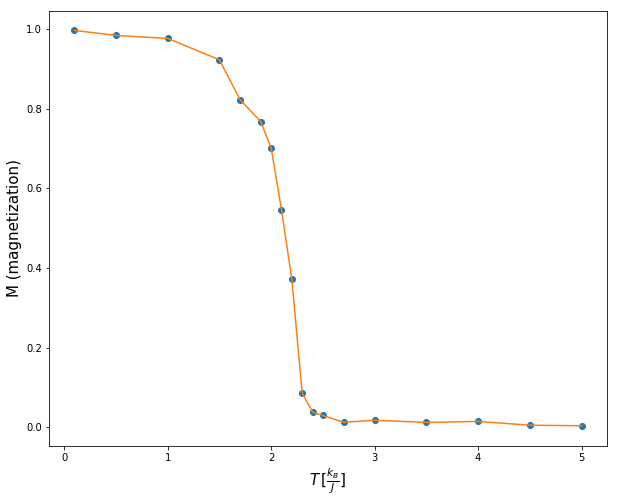

In [32]:
plt.figure(figsize=(10,8))
plt.plot(T, M_list,'o')#color = 'pink'
plt.plot(T, M_list)
plt.xlabel('$T \\, [\\frac{k_B}{J}]$',fontsize=15)
plt.ylabel('M (magnetization)',fontsize=15)
plt.show()

In [21]:
def m(T,Tc,A,exponent,b):
    return A*(abs(Tc-T))**(exponent)+b

In [91]:
mag,mag_div = curve_fit(m,T[0:10],M_list[0:10],p0 = np.array([2.2,0.6,0.1,0.001]),
                      bounds = ([0,0,0,0],[np.inf,np.inf,np.inf,np.inf]),maxfev = 10000)

In [92]:
mag[0],mag[1],mag[-2],mag[-1]

(2.2999157370138583,
 0.8832151664041539,
 0.24780699348783916,
 8.223165641415425e-15)

In [93]:
T[14]

3.5

In [94]:
M_list[14]

0.012416666666666673

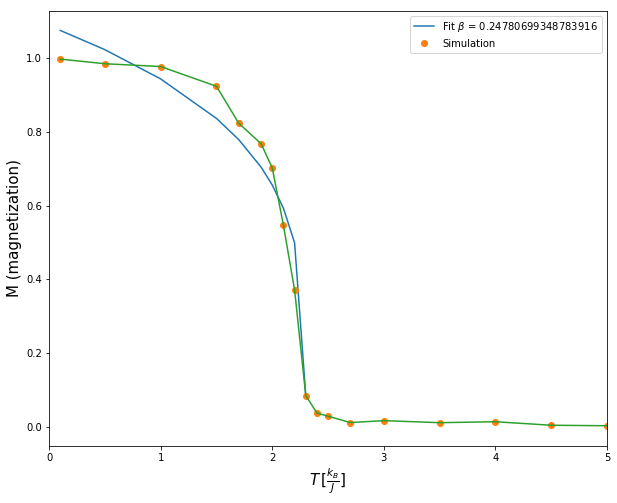

In [95]:
#mag = np.array([7.0, 0.6, 0.5, 0.00001])
plt.figure(figsize=(10,8))
plt.plot(T[0:10], m(np.array(T[0:10]),*mag),label='Fit $\\beta$ = '+str(mag[-2]))
plt.plot(T[0:], M_list[0:],'o',label = 'Simulation')
plt.plot(T[0:], M_list[0:])
plt.xlim(0,5)
plt.xlabel('$T \\, [\\frac{k_B}{J}]$',fontsize=15)
plt.ylabel('M (magnetization)',fontsize=15)
#label('$T_c$ = '+str(mag[0]))

plt.legend()
plt.show()

In [89]:
_beta = mag[-2]
_beta

0.2477431617046555

In [90]:
_Tc1 =mag[0]
_Tc1

2.300080738347478

# Fit Susceptibility

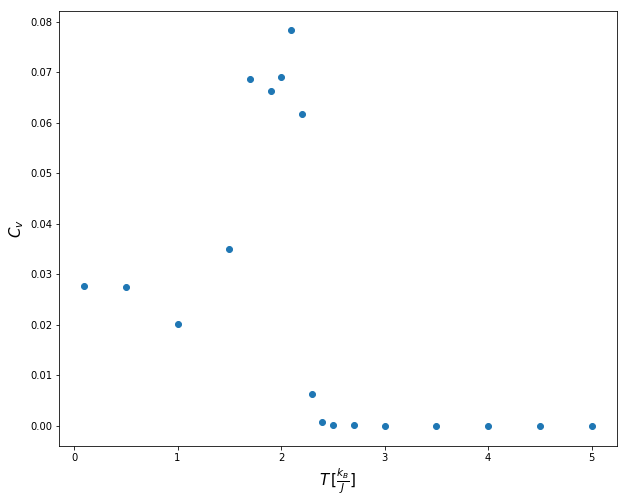

In [34]:
plt.figure(figsize=(10,8))
plt.plot(T, Chi_list,'o')#color = 'pink'
#plt.plot(T, Chi_list)
plt.xlabel('$T \\, [\\frac{k_B}{J}]$',fontsize=15)
#plt.ylabel('M (magnetization)',fontsize=15)
plt.ylabel ("$C_v$",fontsize = 15)
plt.show()

In [35]:
def chi(T,Tc,A,gamma,b):
    return A*(abs(Tc-T))**(-gamma)-b

In [36]:
suscp,suscp_dev = curve_fit(chi,T[0:6],Chi_list[0:6],p0 = np.array([2.27,0.5,2,0.00001]),
                      bounds = ([1,0,0,0],[3,np.inf,2,np.inf]),maxfev = 100000)

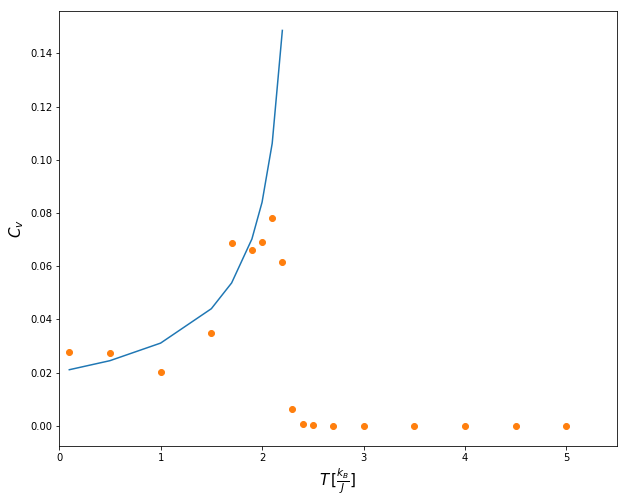

In [37]:
plt.figure(figsize=(10,8))
plt.plot(T[0:9], chi(np.array(T[0:9]),*suscp))
plt.plot(T[0:], Chi_list[0:],'o')
plt.xlim(0,5.5)
plt.xlabel('$T \\, [\\frac{k_B}{J}]$',fontsize=15)
#plt.ylabel('M (magnetization)',fontsize=15)
plt.ylabel ("$C_v$",fontsize = 15)
plt.show()

In [38]:
suscp

array([2.38427172e+00, 3.99976933e-02, 7.76092129e-01, 1.41900819e-23])

In [39]:
suscm,suscm_dev = curve_fit(chi,T[7:],Chi_list[7:],
                      bounds = (0,[np.inf,np.inf,np.inf,np.inf]),maxfev = 100000)

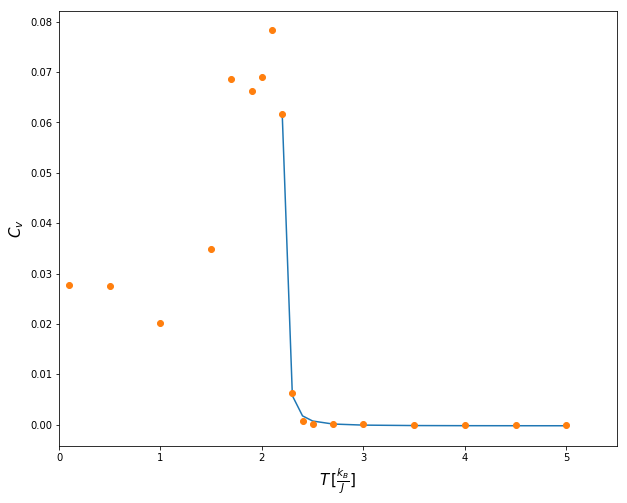

In [40]:
#suscm = np.array([6.2, 1.95163279e-03, 1.00000000e+00, 6.93660749e-04])
plt.figure(figsize=(10,8))
plt.plot(T[8:], chi(np.array(T[8:]),*suscm))
plt.plot(T[0:], Chi_list[0:],'o')
plt.xlim(0,5.5)
plt.xlabel('$T \\, [\\frac{k_B}{J}]$',fontsize=15)
#plt.ylabel('M (magnetization)',fontsize=15)
plt.ylabel ("$C_v$",fontsize = 15)
plt.show()

In [41]:
suscm

array([2.14730027e+00, 9.59886590e-05, 2.19801675e+00, 2.24159151e-04])

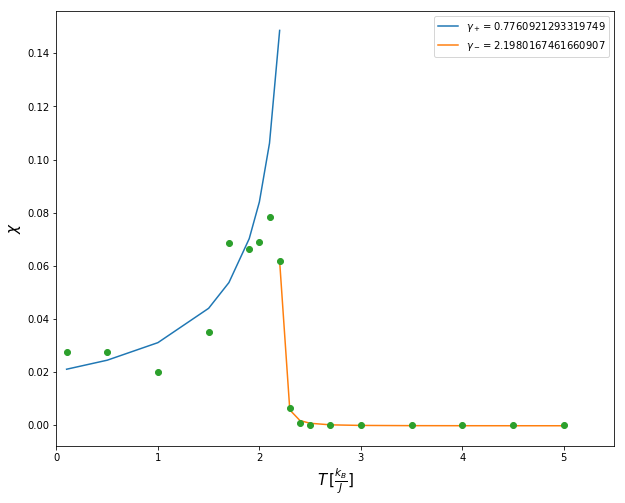

In [56]:
plt.figure(figsize=(10,8))
plt.plot(T[0:9], chi(np.array(T[0:9]),*suscp),label = '$\gamma_+ = $'+str(suscp[-2]) )
plt.plot(T[8:], chi(np.array(T[8:]),*suscm),label = '$\gamma_- = $'+str(suscm[-2]))
plt.plot(T[0:], Chi_list[0:],'o')
plt.xlim(0,5.5)
plt.xlabel('$T \\, [\\frac{k_B}{J}]$',fontsize=15)
#plt.ylabel('M (magnetization)',fontsize=15)
plt.ylabel ("$\chi$",fontsize = 15)
plt.legend()
plt.show()

In [46]:
_gammap = suscp[-2]
_gammam = suscm[-2]

_gamma = (_gammap+_gammam)/2
_gamma

1.4870544377490327

In [47]:
_Tc2 = (suscm[0]+suscp[0])/2
_Tc2

2.265785994598976

## Heat Capacity Fit

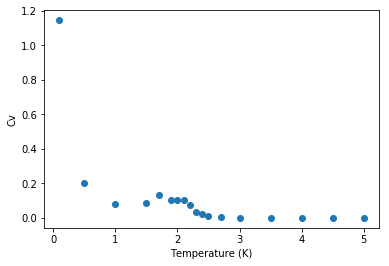

In [155]:
plt.plot(T, Cv_list,'o')#color = 'pink'
#plt.plot(T, Cv_list)
plt.xlabel("Temperature (K)")
plt.ylabel ("Cv")
plt.show()

In [48]:
def cv(T,Tc,A,alpha,b):
    return A*(abs(Tc-T))**(-alpha)-b

In [49]:
heatcap,heatcap_dev = curve_fit(cv,T[2:],Cv_list[2:],p0 = np.array([2.27,0,0.0,0.0001]),
                      bounds = ([2,0,0,0],[np.inf,np.inf,np.inf,np.inf]),maxfev = 100000)

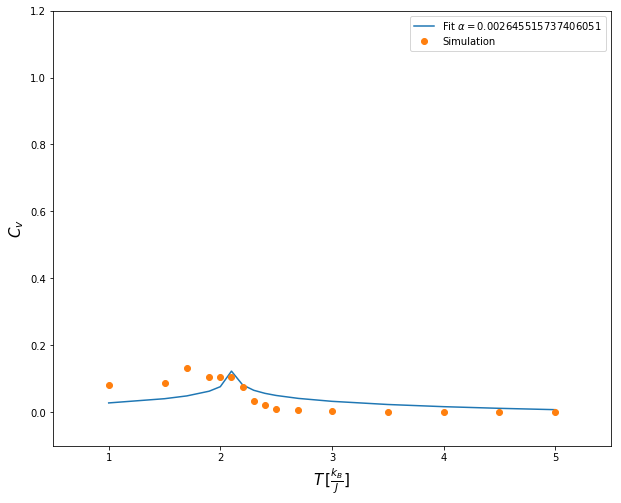

In [55]:
plt.figure(figsize=(10,8))
plt.plot(T[2:], cv(np.array(T[2:]),*heatcap),label = 'Fit $\\alpha = $'+str(heatcap[-2]))
plt.plot(T[2:], Cv_list[2:],'o', label = 'Simulation')
plt.xlim(0.5,5.5)
plt.ylim(-0.1,1.2)
plt.xlabel('$T \\, [\\frac{k_B}{J}]$',fontsize=15)
plt.ylabel ("$C_v$",fontsize = 15)
plt.legend()
plt.show()

In [274]:
heatcap

array([2.11276236e+00, 7.99332367e+00, 2.64551574e-03, 7.96374137e+00])

In [275]:
_Tc3 = heatcap[0]
_Tc3

2.112762356573582

In [276]:
_alpha = heatcap[-2]
_alpha

0.002645515737406051

In [277]:
Ave_Tc = (_Tc1+_Tc2+_Tc3)/3
Ave_Tc

2.2261827803732195

## Fit Correction Function

In [278]:
G_T = []
for t in range(len(T)):
    G = []
    double=0
    single1=0
    single2=0
    for r in range(1,97):
        double = 0
        single1 =0
        single2 =0
        for nstep in range(0,996):
            double+=S0SR_list[nstep][t][r]
            #single1+=S0[n][i]
            #single2+=S0[n][i]
        #G.append(double/len(S0SR)-(single1/len(S0))*(single2/len(SR)))
        G.append(abs(double/996))
        
    G_T.append(G)

In [279]:
T[8] # The closed value in our simulation

2.2

In [280]:
def Corr(r,eta):
    return r**(-2+2-eta)

eps,eps_div = curve_fit(Corr,np.array(range(1,97)),np.array(G_T[9]), maxfev = 10000)

# Using nv = gamma/(2-eta)
eta = eps[0]
nv = _gamma/(2-eta)
nv

0.9087929201882907

In [1]:
_gamma = 1.4870544377490327

In [97]:
eta

NameError: name 'eta' is not defined